In [1]:
#Importing the libraries
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Fraud_Detection/creditcard.csv')
# Check for missing values
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [3]:
#Visualizing the datset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

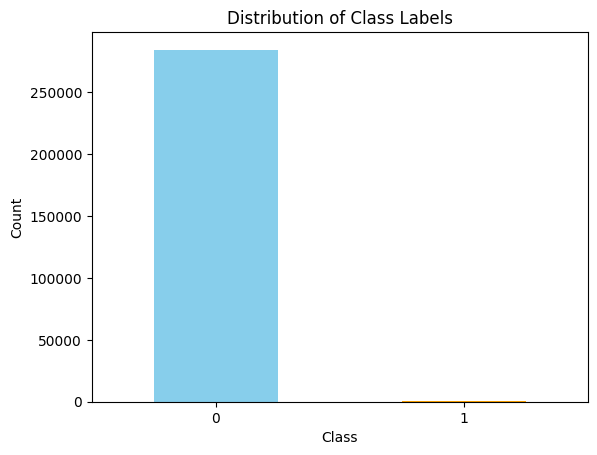

In [5]:

class_distribution = dataset['Class'].value_counts()

# Create a bar chart
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=0)
plt.show()

In [6]:
#We can see there is an imbalanced datset

# Create 'fraud' and 'non_fraud' objects
fraud = dataset[dataset['Class'] == 1]
non_fraud = dataset[dataset['Class'] == 0]

# Check frequency
fraud_frequency = fraud.shape[0]
non_fraud_frequency = non_fraud.shape[0]

# Check minimum and maximum values for 'fraud' and 'non_fraud'
fraud_stats = fraud['Amount'].describe()
non_fraud_stats = non_fraud['Amount'].describe()

# Display results
print("Frequency of Fraudulent Transactions:", fraud_frequency)
print("Frequency of Non-Fraudulent Transactions:", non_fraud_frequency)

print("\nStatistics for Fraudulent Transactions:")
print(fraud_stats)

print("\nStatistics for Non-Fraudulent Transactions:")
print(non_fraud_stats)


Frequency of Fraudulent Transactions: 492
Frequency of Non-Fraudulent Transactions: 284315

Statistics for Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Statistics for Non-Fraudulent Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [7]:
#Splitting dataset into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [8]:
#DATA CLEANNING - dealing with outliers and missing values
# Check for missing values
null_counts = dataset.isnull().sum()
print(null_counts)
#Question to ask - Do we have outliers for Classifcation problems?


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Now X_train_resampled and y_train_resampled contain the resampled training data


In [11]:
#Building our Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train_resampled, Y_train_resampled)

DecisionTreeClassifier(random_state=0)

In [12]:
#Making the confusion matrix for our Decision Tree Classifier model
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_pred)
accuracy_dt = 100 * accuracy_score(Y_test, Y_pred)
print(f"The confusion matrix for Decision Tree Classifier model: \n {cm_dt}")
print(f"The accuracy score for Decision Tree Classifier without K-fold cross-validation: {accuracy_dt:.2f}% ")

The confusion matrix for Decision Tree Classifier model: 
 [[56731   130]
 [   19    82]]
The accuracy score for Decision Tree Classifier without K-fold cross-validation: 99.74% 


In [13]:
#Applying K-fold Cross-validation
from sklearn.model_selection import cross_val_score

accuracies_dt = cross_val_score(estimator=classifier_dt, X=X_train_resampled, y=Y_train_resampled, cv=10, n_jobs=-1)
print("Accuracy after K-fold Cross-validation: {:.2f} %".format(accuracies_dt.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std() * 100))

Accuracy after K-fold Cross-validation: 99.83 %
Standard Deviation: 0.02 %


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"The predicted test set is : \n {Y_pred}")
cm_test = confusion_matrix(Y_test, Y_pred)
print('\n')
print(cm_test)
report_test_dt = classification_report(Y_test, Y_pred)
print("Classification report for test set for Decision Tree Classifier model: \n", report_test_dt)

The predicted test set is : 
 [0 0 0 ... 0 0 0]


[[56731   130]
 [   19    82]]
Classification report for test set for Decision Tree Classifier model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.39      0.81      0.52       101

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962

